In [34]:
!pip install requests csv pandas json matplotlib seaborn datetime
import requests
import csv
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Create a questions csv file**

In [35]:
json_url = 'https://www.jsonkeeper.com/b/LLQT'  # JSON URL
response = requests.get(json_url)
data = response.json()

# Initialize a list to hold the rows for the CSV
rows = []

# Loop through the questions in the quiz
for question in data['quiz']['questions']:
    question_id = question['id']
    options = question['options']

    # Get all options IDs and descriptions
    option_data = {}
    for i, option in enumerate(options):
        option_data[f'option {i + 1}'] = option['id']

    # Find the correct option ID
    correct_option = next(option['id'] for option in options if option['is_correct'])

    # Create the row for the current question
    row = {'question_id': question_id, **option_data, 'correct option': correct_option}
    rows.append(row)

df = pd.DataFrame(rows)

output_csv_path = 'questions.csv'  # Output CSV file path
df.to_csv(output_csv_path, index=False)

print(f"CSV file created successfully! You can download it from {output_csv_path}")

CSV file created successfully! You can download it from /content/questions.csv


**Function to process the data**

In [36]:
def process_quiz_data(data):
    processed_data = []
    all_response_keys = set()  # To collect all possible response_map keys dynamically

    for item in data:
        # Extracting required fields
        row = {
            "id": item.get("id"),
            "quiz_id": item.get("quiz_id"),
            "score": item.get("score"),
            "trophy_level": item.get("trophy_level"),
            "accuracy": item.get("accuracy"),
            "speed": item.get("speed"),
            "final_score": item.get("final_score"),
            "negative_score": item.get("negative_score"),
            "correct_answers": item.get("correct_answers"),
            "incorrect_answers": item.get("incorrect_answers"),
            "better_than": item.get("better_than"),
            "rank_text": item.get("rank_text"),
            "title": item["quiz"].get("title") if "quiz" in item else None,
            "topic": item["quiz"].get("topic") if "quiz" in item else None,
        }

        # Extract response_map data
        response_map = item.get("response_map", {})
        for question_key, answer_selected in response_map.items():
            row[f"question_key_{question_key}"] = question_key
            row[f"answer_selected_{question_key}"] = answer_selected
            all_response_keys.add(f"question_key_{question_key}")
            all_response_keys.add(f"answer_selected_{question_key}")

        processed_data.append(row)

    return processed_data, all_response_keys

# Fetch data from the URL
url = "https://api.jsonserve.com/XgAgFJ"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Process data and collect all response keys
    processed_data, all_response_keys = process_quiz_data(data)

    # Define fieldnames including dynamically collected response keys
    static_fieldnames = [
        "id", "quiz_id", "score", "trophy_level", "accuracy", "speed",
        "final_score", "negative_score", "correct_answers", "incorrect_answers",
        "better_than", "rank_text", "title", "topic"
    ]
    fieldnames = static_fieldnames + sorted(all_response_keys)  # Combine static and dynamic keys

    # Write data to CSV
    with open("user_quiz_data.csv", "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Fill missing dynamic keys with None for each record
        for row in processed_data:
            for key in fieldnames:
                if key not in row:
                    row[key] = None
            writer.writerow(row)

    print("Data has been written to user_quiz_data.csv")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


Data has been written to user_quiz_data.csv


**Creating a new csv without response map**

In [37]:
def process_quiz_data(data):
    processed_data = []
    # all_response_keys = set()  # To collect all possible response_map keys dynamically

    for item in data:
        # Extracting required fields
        row = {
            "id": item.get("id"),
            "quiz_id": item.get("quiz_id"),
            "score": item.get("score"),
            "trophy_level": item.get("trophy_level"),
            "accuracy": item.get("accuracy"),
            "speed": item.get("speed"),
            "final_score": item.get("final_score"),
            "negative_score": item.get("negative_score"),
            "correct_answers": item.get("correct_answers"),
            "incorrect_answers": item.get("incorrect_answers"),
            "better_than": item.get("better_than"),
            "rank_text": item.get("rank_text"),
            "title": item["quiz"].get("title") if "quiz" in item else None,
            "topic": item["quiz"].get("topic") if "quiz" in item else None,
        }

        # # Extract response_map data
        # response_map = item.get("response_map", {})
        # for question_key, answer_selected in response_map.items():
        #     row[f"question_key_{question_key}"] = question_key
        #     row[f"answer_selected_{question_key}"] = answer_selected
        #     all_response_keys.add(f"question_key_{question_key}")
        #     all_response_keys.add(f"answer_selected_{question_key}")

        processed_data.append(row)

    return processed_data

# Fetch data from the URL
url = "https://api.jsonserve.com/XgAgFJ"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Process data and collect all response keys
    processed_data = process_quiz_data(data)

    # Define fieldnames including dynamically collected response keys
    static_fieldnames = [
        "id", "quiz_id", "score", "trophy_level", "accuracy", "speed",
        "final_score", "negative_score", "correct_answers", "incorrect_answers",
        "better_than", "rank_text", "title", "topic"
    ]
    fieldnames = static_fieldnames # Combine static and dynamic keys

    # Write data to CSV
    with open("user_quizes.csv", "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Fill missing dynamic keys with None for each record
        for row in processed_data:
            for key in fieldnames:
                if key not in row:
                    row[key] = None
            writer.writerow(row)

    print("Data has been written to user_quiz_data.csv")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


Data has been written to user_quiz_data.csv


In [38]:
df_csv = pd.read_csv('user_quizes.csv')

url = "https://api.jsonserve.com/XgAgFJ"  # JSON URL
response = requests.get(url)
data_json = response.json()

# Convert the JSON data to a DataFrame
df_json = pd.json_normalize(data_json)

# Merge the `time_taken` from JSON data into the CSV data (assuming common `id`)
def calculate_duration(row):
    started_time = datetime.strptime(row['started_at'][11:16], "%H:%M")
    ended_time = datetime.strptime(row['ended_at'][11:16], "%H:%M")
    duration = (ended_time - started_time).total_seconds() / 60  # Convert to minutes
    return duration

# Calculate the time_taken for each record in the JSON DataFrame
df_json['time_taken'] = df_json.apply(calculate_duration, axis=1)

df_csv['time_taken'] = df_json['time_taken']

df_csv.to_csv('user_quiz_data_with_duration.csv', index=False)

In [39]:
file_path = 'user_quiz_data_with_duration.csv'
df = pd.read_csv(file_path)

# Calculate normalized score: final_score / (correct_answers + incorrect_answers)
df['total_questions'] = df['correct_answers'] + df['incorrect_answers']
df['normalized_score'] = df['final_score'] / df['total_questions']

output_file_path = 'user_quiz_data_with_normalized_score.csv'
df.to_csv(output_file_path, index=False)

print(f"Updated CSV with normalized score saved to {output_file_path}")

Updated CSV with normalized score saved to user_quiz_data_with_normalized_score.csv


**Task:**
1. Analyze the Data:
Explore the schema and identify patterns in student performance by topics, difficulty levels, and response accuracy.
2. Generate Insights:
Highlight weak areas, improvement trends, and performance gaps for a given user.
3. Create Recommendations:
Propose actionable steps for the user to improve, such as suggested topics, question types, or difficulty levels to focus on.



Task 1: Identify Patterns in Response Accuracy


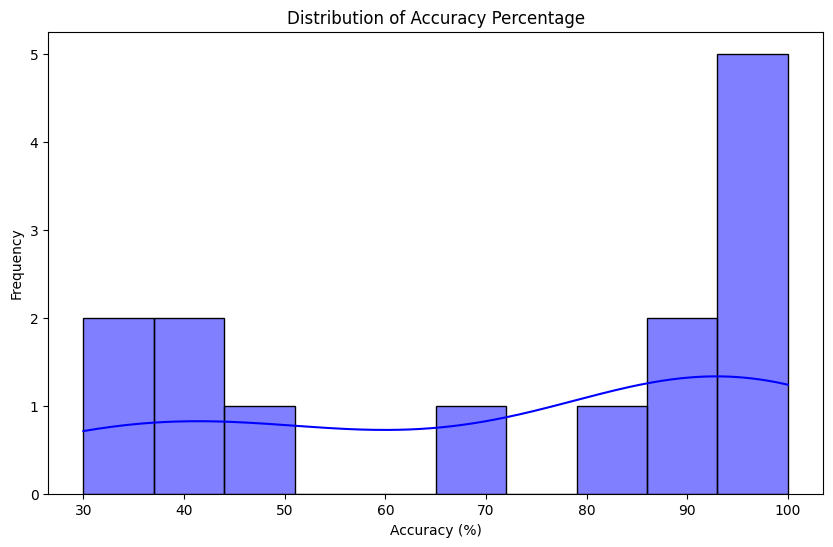

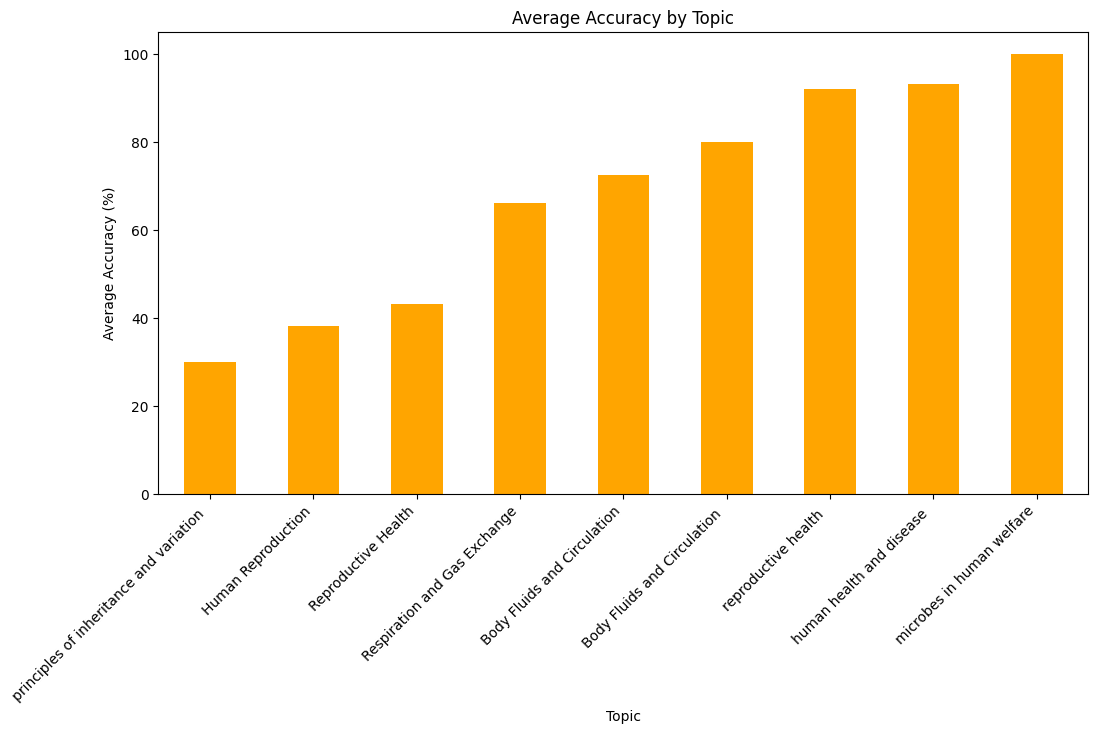

topic
principles of inheritance and variation      30.000000
Human Reproduction                           38.000000
Reproductive Health                          43.000000
Respiration and Gas Exchange                 66.000000
Body Fluids and Circulation                  72.333333
Body Fluids and Circulation                  80.000000
reproductive health                          92.000000
human health and disease                     93.000000
microbes in human welfare                   100.000000
Name: accuracy_percentage, dtype: float64

Task 2: Generate Insights

Weak Areas:
topic
principles of inheritance and variation     30.0
Human Reproduction                          38.0
Reproductive Health                         43.0
Name: accuracy_percentage, dtype: float64

Performance Gaps:
                                         score                   \
                                           min  max        mean   
topic                                                             
Bo

In [40]:
def load_data(file_path):
    return pd.read_csv(file_path)

# Task 1: Identify Patterns in Response Accuracy
def task_1(data):
    data['accuracy_percentage'] = data['accuracy'].str.rstrip('%').astype(float)

    # Overall accuracy patterns
    plt.figure(figsize=(10, 6))
    sns.histplot(data['accuracy_percentage'], bins=10, kde=True, color="blue")
    plt.title("Distribution of Accuracy Percentage")
    plt.xlabel("Accuracy (%)")
    plt.ylabel("Frequency")
    plt.show()

    # Average accuracy by topic
    avg_accuracy_topic = data.groupby('topic')['accuracy_percentage'].mean().sort_values()
    avg_accuracy_topic.plot(kind='bar', figsize=(12, 6), color="orange")
    plt.title("Average Accuracy by Topic")
    plt.xlabel("Topic")
    plt.ylabel("Average Accuracy (%)")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    return avg_accuracy_topic

# Task 2: Generate Insights
def task_2(data):
    insights = {}

    # Weak areas: Topics with lowest accuracy
    data['accuracy_percentage'] = data['accuracy'].str.rstrip('%').astype(float)
    weak_topics = data.groupby('topic')['accuracy_percentage'].mean().sort_values().head(3)
    insights['Weak Areas'] = weak_topics

    # Performance gaps: Differences between highest and lowest scores
    performance_gaps = data.groupby('topic').agg({
        'score': ['min', 'max', 'mean'],
        'accuracy_percentage': 'mean'
    })
    insights['Performance Gaps'] = performance_gaps

    return insights

# Task 3: Create Recommendations
def task_3(data):
    recommendations = []

    # Focus on weak topics
    data['accuracy_percentage'] = data['accuracy'].str.rstrip('%').astype(float)
    weak_topics = data.groupby('topic')['accuracy_percentage'].mean().sort_values().head(3).index.tolist()
    recommendations.append(f"Focus more on these weak topics: {', '.join(weak_topics)}")

    # Improve speed if required
    avg_speed = data['speed'].astype(float).mean()
    if avg_speed < 80:
        recommendations.append("Work on improving your speed; aim for a speed of at least 80.")

    # Suggestions for improvement based on performance gaps
    performance_gaps = data.groupby('topic')['accuracy_percentage'].mean().sort_values()
    for topic, accuracy in performance_gaps.items():
        if accuracy < 50:
            recommendations.append(f"Practice more questions in the topic '{topic}' as the average accuracy is below 50%.")

    return recommendations

# Main Function
def Task():
    # Load data
    file_path = 'user_quiz_data_with_normalized_score.csv'  # Replace with your CSV file path
    data = load_data(file_path)

    # Task 1: Identify Patterns in Response Accuracy
    print("\nTask 1: Identify Patterns in Response Accuracy")
    avg_accuracy_topic = task_1(data)
    print(avg_accuracy_topic)

    # Task 2: Generate Insights
    print("\nTask 2: Generate Insights")
    insights = task_2(data)
    for key, value in insights.items():
        print(f"\n{key}:\n{value}")

    # Task 3: Create Recommendations
    print("\nTask 3: Create Recommendations")
    recommendations = task_3(data)
    for rec in recommendations:
        print(f"- {rec}")


Task()


**Bonus Points:**

> Analyze and define the student persona based on patterns in the data.

> Highlight specific strengths and weaknesses with creative labels or insights.


In [41]:
def analyze_student_persona(data):

    persona = {}

    # Consistency analysis
    if (data['accuracy'].str.rstrip('%').astype(float) >= 90).mean() > 0.7:
        persona['persona_type'] = "Consistent High Performer"
    elif (data['accuracy'].str.rstrip('%').astype(float) < 50).mean() > 0.5:
        persona['persona_type'] = "Inconsistent Performer"
    else:
        persona['persona_type'] = "Improving Learner"

    # Speed analysis
    avg_speed = data['speed'].astype(float).mean()
    if avg_speed > 95:
        persona['speed'] = "Fast Thinker"
    elif avg_speed > 70:
        persona['speed'] = "Balanced Thinker"
    else:
        persona['speed'] = "Needs Time to Process"

    # Trophy analysis
    avg_trophy = data['trophy_level'].mean()
    if avg_trophy > 2:
        persona['trophy'] = "Competitive Achiever"
    elif avg_trophy == 2:
        persona['trophy'] = "Dedicated Competitor"
    else:
        persona['trophy'] = "Casual Learner"


    accuracy = data['accuracy'].str.rstrip('%').astype(float)
    speed = data['speed'].astype(float)

    # speed and accuracy analysis
    if accuracy.mean() >= 90 and speed.mean() >= 95:
        persona["accuracy with speed"] = "Sharp Shooter"  # High accuracy and speed
    elif accuracy.mean() >= 90 and speed.mean() < 95:
        persona["accuracy with speed"] = "Precise Strategist"  # High accuracy, moderate speed
    elif accuracy.mean() < 90 and accuracy.mean() > 70 and speed.mean() >= 95:
        persona["accuracy with speed"] = "Quick Responder"  # Moderate accuracy, high speed
    else:
        persona["accuracy with speed"] = "Steady Learner"  # Moderate accuracy and speed


    avg_time=data['time_taken'].astype(float).mean()

    # avgerage time taken to complete and accuracy analysis
    if accuracy.mean() >= 90 and avg_time <= 10:
        persona['accuracy_time_persona'] = "Accurate and Fast"
    elif accuracy.mean() >= 90 and avg_time> 10:
        persona['accuracy_time_persona'] = "Accurate and Thoughtful"
    elif accuracy.mean() >= 70 and avg_time <= 10:
        persona['accuracy_time_persona'] = "Moderately Accurate and Quick"
    else:
        persona['accuracy_time_persona'] = "Needs Focus and Time"

    return persona


def highlight_strengths_and_weaknesses(data):

    strengths = []
    weaknesses = []

    # Identifying strengths
    if (data['correct_answers'] > 20).mean() > 0.5:
        strengths.append("High Accuracy in Solving Complex Topics")
    if data['better_than'].mean() > 100:
        strengths.append("Outperforming Peers in Most Tests")

    '''
      Thought to use rank but it is not useful.

    if (data['rank_text'].str.contains("-#")).mean() > 0.7:
    if (data['rank_text'].str.extract(r'-#(\d+)')).mean() > 0.7:
        strengths.append("Excellent Ranking Consistency")

    '''

    # Identifying weaknesses
    if (data['negative_score'].astype(float) > 10).mean() > 0.3:
        weaknesses.append("Struggles with Negative Marking")
    if (data['accuracy'].str.rstrip('%').astype(float) < 60).mean() > 0.5:
        weaknesses.append("Accuracy Needs Significant Improvement")
    if data['final_score'].mean() < 50:
        weaknesses.append("Overall Scores Below Benchmark")

    # Creative insights
    labels = {
        "strengths": ", ".join(strengths) if strengths else "No notable strengths identified.",
        "weaknesses": ", ".join(weaknesses) if weaknesses else "No significant weaknesses identified.",
    }

    return labels


def main():
    # Load data from the CSV file
    file_path = "user_quiz_data_with_normalized_score.csv"
    data = pd.read_csv(file_path)

    # Analyze student persona
    persona = analyze_student_persona(data)
    print("Student Persona:")
    for key, value in persona.items():
        print(f"- {key}: {value}")

    # Highlight strengths and weaknesses
    insights = highlight_strengths_and_weaknesses(data)
    print("\nStrengths and Weaknesses:")
    for key, value in insights.items():
        print(f"- {key.capitalize()}: {value}")



main()


Student Persona:
- persona_type: Improving Learner
- speed: Fast Thinker
- trophy: Competitive Achiever
- accuracy with speed: Quick Responder
- accuracy_time_persona: Moderately Accurate and Quick

Strengths and Weaknesses:
- Strengths: Outperforming Peers in Most Tests
- Weaknesses: No significant weaknesses identified.
